In [262]:
#About the data:
#https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# State	                    : 거주구역
# Sex	                    : 성별
# GeneralHealth	            : 일상적인 몸 상태 [Excellent, Very good, Good, Fair, Poor]
# PhysicalHealthDays	    : 30일 기준, 질병이나 부상 등 신체적으로 아픈 날 수
# MentalHealthDays	        : 30일 기준, 우울이나 스트레스 등 정신적으로 아픈 날 수
# LastCheckupTime	        : 마지막으로 검진 받은 기록 [1년 이내, 1~2년, 2~5년, 5년 이상]
# PhysicalActivities	    : 운동 / 신체적 활동 있는지
# SleepHours	            : 수면 시간
# RemovedTeeth	            : 발치 수
# HadHeartAttack	        : 심장마비 경험
# HadAngina                 : 협심증
# HadStroke                 : 뇌졸증
# HadAsthma                 : 천식
# HadSkinCancer             : 피부암
# HadCOPD                   : 만성폐쇄성폐질환
# HadDepressiveDisorder     : 우울증
# HadKidneyDisease          : 신부증
# HadArthritis              : 관절염
# HadDiabetes               : 당뇨 [당뇨 아님, 전당뇨거나 경계성 당뇨, 임신성 당뇨, 당뇨]
# DeafOrHardOfHearing       : 청각장애
# BlindOrVisionDifficulty	: 시각장애
# DifficultyConcentrating	: 집중하기 힘듦
# DifficultyWalking	        : 걷기 힘듦
# DifficultyDressingBathing	: 스스로 옷을 입거나 씻기 힘듦
# DifficultyErrands	        : 일상 업무에 어려움
# SmokerStatus	            : 흡연자 [비흡연자, 금연, 종종 흡연, 매일 흡연]
# ECigaretteUsage	        : 전자담배 흡연자 [경헙 없음, 현재는 사용하지 않음, 종종 흡연, 매일 흡연]
# ChestScan	                : 가슴 CT 나 X-ray 촬영 여부
# RaceEthnicityCategory	    : 인종 [히스패닉, 흑인, 백인, 여러인종, 다른 인종) [다른 인종들은 히스패닉이 아닌 경우에만 표시]
# AgeCategory	            : 나이 카테고리 [18~24, 25~29, 30~34, 35~39, 40~44, 45~49, 50~54, 55~59, 60~64, 65~69, 70~74, 75~79, 80이상]
# HeightInMeters	        : 키
# WeightInKilograms	        : 몸무게
# BMI	                    : BMI
# AlcoholDrinkers	        : 음주 여부
# HIVTesting	            : HIV 검사 결과
# FluVaxLast12	            : 12개월 안에 감기 백신 접종 여부
# PneumoVaxEver	            : 폐렴 백신 접종 경험
# TetanusLast10Tdap	        : 10년 안에 파상풍 주사 경험 [경험 없음, Tdap 주사, Tdap 외의 다른 약물 주사, 어떤 약물인지 모름]
# HighRiskLastYear	        : 지난해 위험한 사고나 질병 경험 유무
# CovidPos                  : 코로나 확진 여부


# KR_columns = ['거주지역', '성별', '평균 몸 상태', '신체적 통증 유발 수(1개월)',
#        '정신적 통증 유발 수(한 달)', '최종 검진 기록', '신체적 활동 유무',
#        '수면 시간', '발치 수', '심장마비 경험', '협심증',
#        '뇌졸증', '천식', '피부암', '만성폐쇄성폐질환',
#        '우울증', '신부증', '관절염',
#        '당뇨', '청각장애', '시각장애',
#        '집중도 상태', '걷기 상태',
#        '스스로 샤워 및 복장 착용 여부', '일상 업무 어려움', '흡연 여부',
#        '전자담배 흡연 여부', '가슴 CT 및 X-ray 촬영 여부', '인종', '나이',
#        '키', '몸무게', '신체 질량 지수', '음주 여부',
#        'HIV 검사 결과', '감기 백신 접종 여부(1년)', '폐렴 백신 접종 여부', '파상풍 주사 접종 여부(10년)',
#        '중상 및 중병 경험 유무(1년)', '코로나 확진 여부']

보통 심장병의 제일 큰 major factor 는 고혈압, 고 콜레스트롤, 담배.
그 외, 당뇨, 비만 (BMI 높음), 신체적 활동, 음주과다 등도 있음.
classes are unbalanced. 

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MaxAbsScaler
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [ ]:
dataset = pd.read_csv("heart_2022_with_nans.csv")
print(dataset.shape)
dataset.head()

# 데이터 포멧 등 확인

In [ ]:
dataset.columns

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.isna().sum()

In [ ]:
dataset.isnull().sum()

# 데이터 결측치 처리

In [270]:
dataset['GeneralHealth'].value_counts()
dataset['GeneralHealth'] = dataset['GeneralHealth'].fillna("Fair")   # 평균 몸 상태의 결측치를 무난(Fair)으로 대체

In [271]:
dataset['PhysicalHealthDays'].mean()
null_PhysicalHealthD = int(dataset['PhysicalHealthDays'].mean())
null_PhysicalHealthD                                                              # 신체적 통증 유발 총 일 결측치를 평균값으로 대체
dataset['PhysicalHealthDays'] = dataset['PhysicalHealthDays'].fillna(null_PhysicalHealthD)

In [274]:
dataset['MentalHealthDays'].mean()
null_MentalHealthD = int(dataset['MentalHealthDays'].mean())
null_MentalHealthD                                                                 # 정신적 통증 유발 총 일 결측치를 평균값으로 대체

dataset['MentalHealthDays'] = dataset['MentalHealthDays'].fillna(null_MentalHealthD) # 신체적 통증 유발 총 일을 평균값으로 대체

In [275]:

null_LastCheckupTime = dataset['LastCheckupTime'].value_counts().index[0]

dataset['LastCheckupTime'] = dataset['LastCheckupTime'].fillna(null_LastCheckupTime)

In [276]:
dataset['PhysicalActivities'].value_counts()
dataset['PhysicalActivities'] = dataset['PhysicalActivities'].fillna("No")

In [277]:
dataset['SleepHours'].value_counts()
dataset['SleepHours'] = dataset['SleepHours'].fillna(7.0)

In [278]:
dataset['RemovedTeeth'] = dataset['RemovedTeeth'].fillna("None of Them")

In [284]:
dataset = dataset.dropna(subset=['HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', ], how='any', axis=0)                                    

# 해당 feature의 결측치는 어떤 대체값을 넣든 부적합하다고 판단, 행 제거 작업을 시행


dataset.isna().sum()

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                      0
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating       1670
DifficultyWalking              823
DifficultyDressingBathing      305
DifficultyErrands              711
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                    13428
RaceEthnicityCategor

In [295]:
dataset.dropna(subset=['HeightInMeters', 'WeightInKilograms'], how='any', inplace=True)
dataset['HeightInMeters'].value_counts()
dataset['WeightInKilograms'].value_counts()


#dataset['BMI'] = dataset.apply(lambda row: row['WeightInKilograms'] / ((row['HeightInMeters']*100)** 2) if pd.isnull(row['BMI']) else row['BMI'], axis=1)


#dataset['BMI'].value_counts()

# 키와 몸무게를 통해 BMI를 계산
# 만약 키와 몸무게 데이터가 없을 시 해당 행은 삭제

WeightInKilograms
90.72     18690
81.65     17310
68.04     15287
72.57     15060
77.11     14092
          ...  
183.25        1
250.38        1
228.61        1
223.62        1
189.00        1
Name: count, Length: 572, dtype: int64

<Axes: xlabel='HadHeartAttack', ylabel='count'>

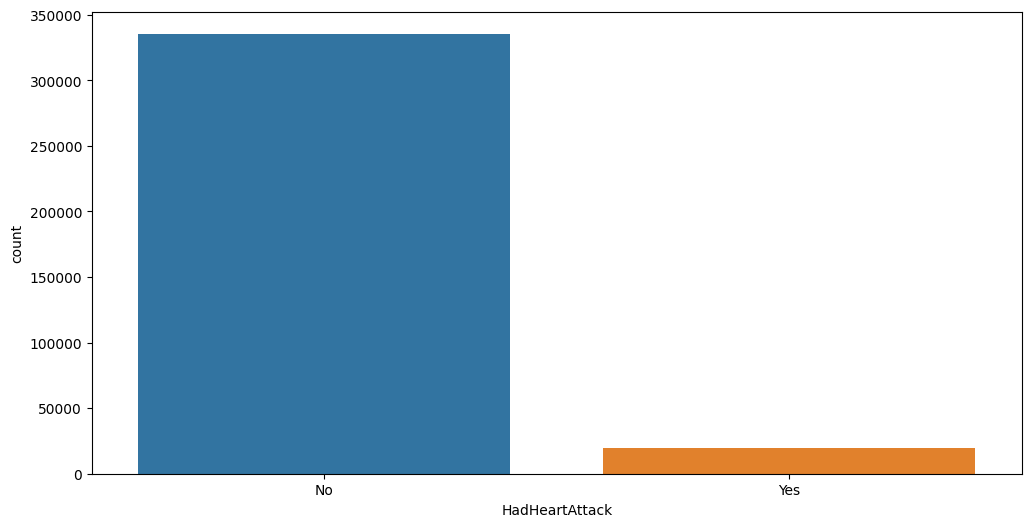

In [282]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'HadHeartAttack', data = dataset)